<a href="https://colab.research.google.com/github/ankitasahapersonal/parkinsons-disease-using-knn-algorithm/blob/main/whatsapp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd


In [ ]:
f=open('/content/WhatsApp Chat with Behena ❤️.txt','r',encoding='utf-8')

In [ ]:
data=f.read()

In [ ]:
print(type(data))

<class 'str'>


In [ ]:
#message and date
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [ ]:
messages=re.split(pattern,data)[1:]
messages

['Behena ❤️: VID-20240707-WA0001.mp4 (file attached)\n',
 'Behena ❤️: IMG-20240707-WA0030.jpg (file attached)\n',
 'Behena ❤️: https://timesofindia.indiatimes.com/city/hyderabad/lack-of-moderation-pares-above-90-list/articleshow/58886008.cms\n',
 'Behena ❤️: <Media omitted>\n',
 'Behena ❤️: Class 12 - year 2017 -\n Roll no - 6638469      Rank in school =??\n',
 'Behena ❤️: Name - Nilima Saha\n',
 'Ankita: Thikache\n',
 'Behena ❤️: Class 10 - year 2015  \nroll no - 6136513 \n  Nilima Saha\nCgpa - 9.8  Institute rank 2\n',
 'Behena ❤️: Eta proove korar jonno ami email pathabo kichu din por\n',
 'Behena ❤️: VID-20240715-WA0030.mp4 (file attached)\n',
 'Behena ❤️: Extempore chilo ..dekhe bol ki ki improve kora jai\n',
 'Ankita: PTT-20240715-WA0041.opus (file attached)\n',
 'Behena ❤️: PTT-20240715-WA0042.opus (file attached)\n',
 'Ankita: Klke sokale mone korabi ekbar\n',
 'Ankita: ankita_result.pdf (file attached)\nankita_result.pdf\n',
 'Ankita: Tomorrow is the holiday. Day after tomorro

In [ ]:
dates=re.findall(pattern,data)
dates

['7/7/24, 02:31 - ',
 '7/7/24, 18:56 - ',
 '7/9/24, 19:02 - ',
 '7/9/24, 21:35 - ',
 '7/12/24, 19:33 - ',
 '7/12/24, 19:33 - ',
 '7/12/24, 19:34 - ',
 '7/12/24, 19:36 - ',
 '7/12/24, 19:36 - ',
 '7/15/24, 12:53 - ',
 '7/15/24, 12:53 - ',
 '7/15/24, 22:49 - ',
 '7/15/24, 22:52 - ',
 '7/15/24, 22:53 - ',
 '7/16/24, 22:59 - ',
 '7/16/24, 23:12 - ',
 '7/16/24, 23:56 - ',
 '7/16/24, 23:59 - ',
 '7/17/24, 23:04 - ',
 '7/17/24, 23:04 - ',
 '7/17/24, 23:04 - ',
 '7/17/24, 23:38 - ',
 '7/17/24, 23:38 - ',
 '7/17/24, 23:38 - ',
 '7/18/24, 18:48 - ',
 '7/18/24, 18:48 - ',
 '7/18/24, 18:51 - ',
 '7/18/24, 19:09 - ',
 '7/18/24, 23:11 - ',
 '7/18/24, 23:11 - ',
 '7/19/24, 00:40 - ',
 '7/19/24, 00:40 - ',
 '7/19/24, 00:40 - ',
 '7/19/24, 00:40 - ',
 '7/19/24, 20:20 - ',
 '7/19/24, 20:20 - ',
 '7/19/24, 20:25 - ',
 '7/19/24, 20:25 - ',
 '7/19/24, 20:25 - ',
 '7/19/24, 20:25 - ',
 '7/19/24, 20:25 - ',
 '7/19/24, 20:25 - ',
 '7/19/24, 20:25 - ',
 '7/19/24, 20:25 - ',
 '7/19/24, 20:45 - ',
 '7/20/24, 11:

In [ ]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})
#convert message_data type
df['message_date']=pd.to_datetime(df['message_date'],format='%m/%d/%y, %H:%M - ')
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date
0,Behena ❤️: VID-20240707-WA0001.mp4 (file attac...,2024-07-07 02:31:00
1,Behena ❤️: IMG-20240707-WA0030.jpg (file attac...,2024-07-07 18:56:00
2,Behena ❤️: https://timesofindia.indiatimes.com...,2024-07-09 19:02:00
3,Behena ❤️: <Media omitted>\n,2024-07-09 21:35:00
4,Behena ❤️: Class 12 - year 2017 -\n Roll no - ...,2024-07-12 19:33:00


In [ ]:
df.shape

(469, 2)

In [ ]:
#separate users and messages
users=[]
messages=[]
for message in df['user_message']:
  entry=re.split('([\w\W]+?):\s',message)
  if entry[1:]: #user name
    users.append(entry[1])
    messages.append(entry[2])
  else:
    users.append('group_notification')
    messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)
df.head()

,date,user,message
0,2024-07-07 02:31:00,Behena ❤️,VID-20240707-WA0001.mp4 (file attached)\n
1,2024-07-07 18:56:00,Behena ❤️,IMG-20240707-WA0030.jpg (file attached)\n
2,2024-07-09 19:02:00,Behena ❤️,https://timesofindia.indiatimes.com/city/hyder...
3,2024-07-09 21:35:00,Behena ❤️,<Media omitted>\n
4,2024-07-12 19:33:00,Behena ❤️,Class 12 - year 2017 -\n Roll no - 6638469 ...


In [ ]:
df['year']=df['date'].dt.year

In [ ]:
df['month']=df['date'].dt.month_name()

In [ ]:
df['day']=df['date'].dt.day

In [ ]:
df['hour']=df['date'].dt.hour

In [ ]:
df['minute']=df['date'].dt.minute

In [ ]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-07-07 02:31:00,Behena ❤️,VID-20240707-WA0001.mp4 (file attached)\n,2024,July,7,2,31
1,2024-07-07 18:56:00,Behena ❤️,IMG-20240707-WA0030.jpg (file attached)\n,2024,July,7,18,56
2,2024-07-09 19:02:00,Behena ❤️,https://timesofindia.indiatimes.com/city/hyder...,2024,July,9,19,2
3,2024-07-09 21:35:00,Behena ❤️,<Media omitted>\n,2024,July,9,21,35
4,2024-07-12 19:33:00,Behena ❤️,Class 12 - year 2017 -\n Roll no - 6638469 ...,2024,July,12,19,33


In [ ]:
df[df['user']=='Ankita'].shape

(279, 8)

In [ ]:
words=[]
for message in df['message']:
  words.extend(message.split())

In [ ]:
len(words)

1547

In [ ]:
df[df['message'] == '<Media omitted>\n'].shape[0]

28

In [ ]:
!pip install urlextract
from urlextract import URLExtract

In [ ]:
links=[]
for message in df['message']:
  extractor=URLExtract()
  links.extend(extractor.find_urls(message))

In [ ]:
len(links)

2

In [ ]:
print(links )

['https://timesofindia.indiatimes.com/city/hyderabad/lack-of-moderation-pares-above-90-list/articleshow/58886008.cms', 'https://moviesrecommendersystem-fm4avmsjwgerjkmuzx6lq5.streamlit.app/']


In [ ]:
x=df['user'].value_counts()

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
name=x.index
count=x.values

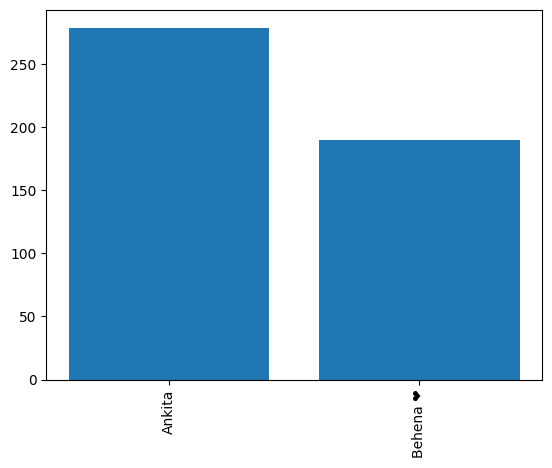

In [ ]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})


,percent,count
0,Ankita,59.49
1,Behena ❤️,40.51


In [ ]:
#most used words
words=[]
for message in temp['message']:
  for word in message.lower().split():
    if word not in stop_words:
      words.append(word)
  words.extend(message.split())

In [ ]:
words

['vid-20240707-wa0001.mp4',
 '(file',
 'attached)',
 'VID-20240707-WA0001.mp4',
 '(file',
 'attached)',
 'img-20240707-wa0030.jpg',
 '(file',
 'attached)',
 'IMG-20240707-WA0030.jpg',
 '(file',
 'attached)',
 'https://timesofindia.indiatimes.com/city/hyderabad/lack-of-moderation-pares-above-90-list/articleshow/58886008.cms',
 'https://timesofindia.indiatimes.com/city/hyderabad/lack-of-moderation-pares-above-90-list/articleshow/58886008.cms',
 'class',
 '12',
 'year',
 '2017',
 'roll',
 '6638469',
 'rank',
 'school',
 '=??',
 'Class',
 '12',
 '-',
 'year',
 '2017',
 '-',
 'Roll',
 'no',
 '-',
 '6638469',
 'Rank',
 'in',
 'school',
 '=??',
 'nilima',
 'saha',
 'Name',
 '-',
 'Nilima',
 'Saha',
 'thikache',
 'Thikache',
 'class',
 '10',
 'year',
 '2015',
 'roll',
 '6136513',
 'nilima',
 'saha',
 'cgpa',
 '9.8',
 'institute',
 'rank',
 'Class',
 '10',
 '-',
 'year',
 '2015',
 'roll',
 'no',
 '-',
 '6136513',
 'Nilima',
 'Saha',
 'Cgpa',
 '-',
 '9.8',
 'Institute',
 'rank',
 '2',
 'proove',

In [ ]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

""


In [ ]:
#remove group notification
temp=df[df['user'] !='group_notification']

In [ ]:
#remove media ommiteed
temp=temp[temp['message']!='<Media omitted>\n']


In [ ]:
#remove stop words
f=open('/content/stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [ ]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.0 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
emojis=[]
for message in temp['message']:
  emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [ ]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😭,5
1,🥲,4
2,🙂,2
3,😂,2
4,😎,1


In [ ]:
df['month_num']=df['date'].dt.month

In [ ]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [ ]:
for i in range(timeline.shape[0]):
  timeline['month'][i]=timeline['month'][i][:3]

<ipython-input-43-b38dcdefefb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeline['month'][i]=timeline['month'][i][:3]
<ipython-input-43-b38dcdefefb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeline['month'][i]=timeline['month'][i][:3]
<ipython-input-43-b38dcdefefb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeline['month'][i]=timeline['month'][i][:3]


In [ ]:
time=[]
for i in range(timeline.shape[0]):
  time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [ ]:
time

['Jul-2024', 'Aug-2024', 'Sep-2024']

In [ ]:
timeline['time']=time

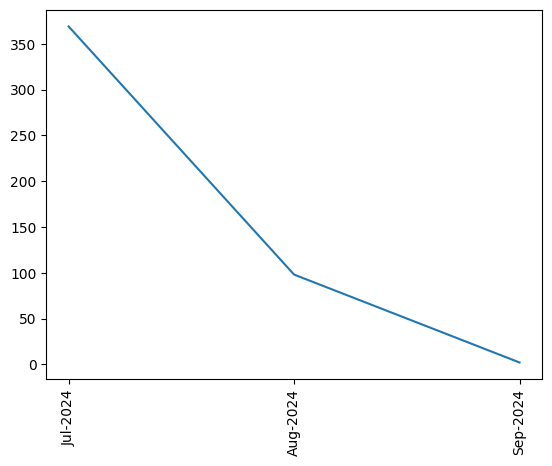

In [ ]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['only_date']=df['date'].dt.date

In [ ]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

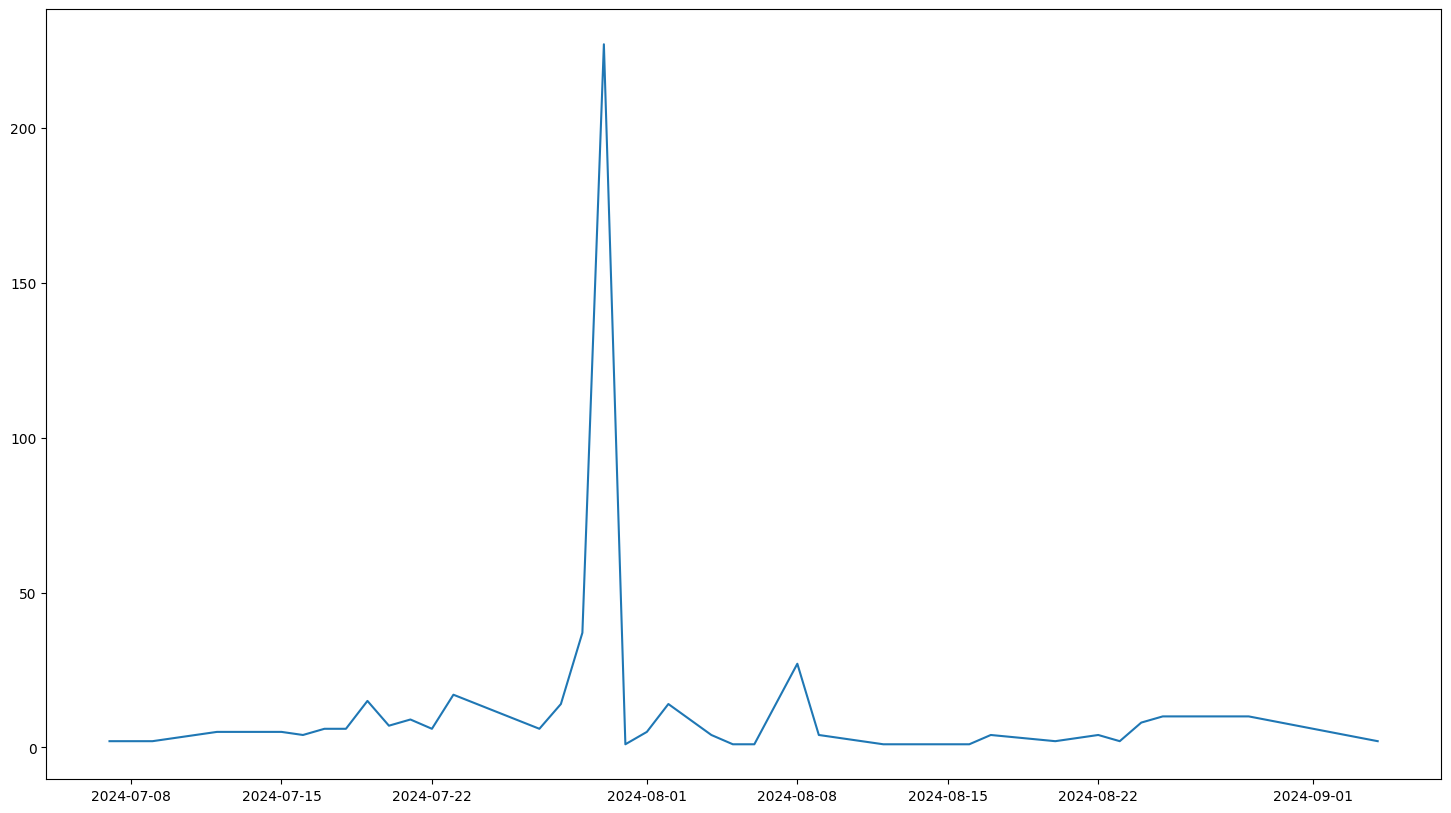

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [ ]:
df['day_name']=df['date'].dt.day_name()

In [ ]:
df['day_name'].value_counts()

,count
day_name,
Tuesday,253
Thursday,52
Monday,50
Friday,41
Sunday,39
Saturday,25
Wednesday,9


In [ ]:
period=[]
for hour in df[['day_name','hour']]['hour']:
  if hour==23:
    period.append(str(hour)+'-'+str('00'))
  elif hour==0:
    period.append(str('00')+'-'+str(hour+1))
  else:
    period.append(str(hour)+'-'+str(hour+1))

In [ ]:
df['period']=period

In [ ]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
5,2024-07-12 19:33:00,Behena ❤️,Name - Nilima Saha\n,2024,July,12,19,33,7,2024-07-12,Friday,19-20
327,2024-07-30 13:30:00,Behena ❤️,This message was deleted\n,2024,July,30,13,30,7,2024-07-30,Tuesday,13-14
169,2024-07-30 11:26:00,Ankita,Kothao ekta rahka ache\n,2024,July,30,11,26,7,2024-07-30,Tuesday,11-12
467,2024-09-04 17:56:00,Behena ❤️,Daruuunnnn\n,2024,September,4,17,56,9,2024-09-04,Wednesday,17-18
24,2024-07-18 18:48:00,Behena ❤️,Are school rank ta bol\n,2024,July,18,18,48,7,2024-07-18,Thursday,18-19


In [ ]:
import seaborn as sns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 [Text(0.5, 0, '00-1'),
  Text(1.5, 0, '10-11'),
  Text(2.5, 0, '11-12'),
  Text(3.5, 0, '12-13'),
  Text(4.5, 0, '13-14'),
  Text(5.5, 0, '14-15'),
  Text(6.5, 0, '15-16'),
  Text(7.5, 0, '17-18'),
  Text(8.5, 0, '18-19'),
  Text(9.5, 0, '19-20'),
  Text(10.5, 0, '2-3'),
  Text(11.5, 0, '20-21'),
  Text(12.5, 0, '21-22'),
  Text(13.5, 0, '22-23'),
  Text(14.5, 0, '23-00'),
  Text(15.5, 0, '3-4'),
  Text(16.5, 0, '4-5'),
  Text(17.5, 0, '9-10')])

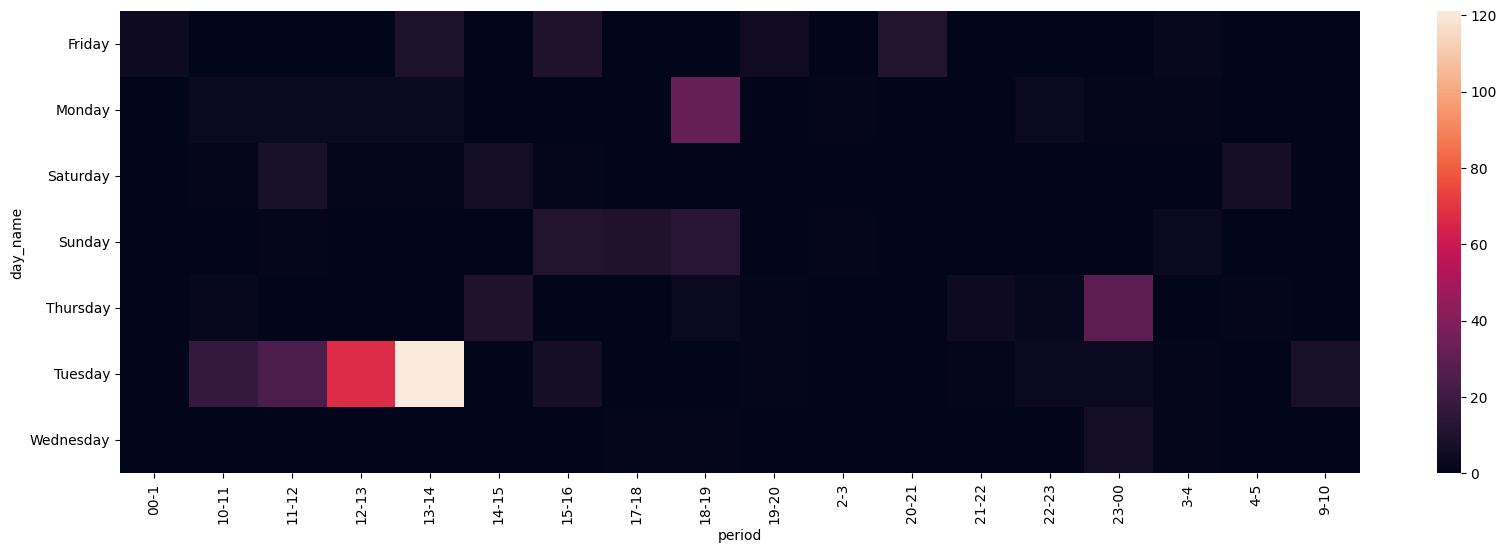

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.xticks(rotation='vertical')